## Задача
Интерполировать функцию $F(z)=\int^1_0 \left( \frac{x}{x+z} \right)^{1.7} exp(-1.6x)dx$ на отрезке $[0;2]$ с точностью 1% полиномом Лагранжа

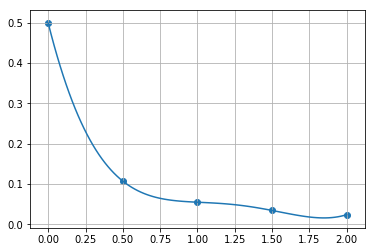

In [24]:
import numpy as np
import matplotlib.pyplot as plt
a = 0 #задаём границы отрезка
b = 2
h = (b - a) / 100 #задаём шаг, в данном случае требуется точность 1%
z0 = 0
zd = 0.25 #дополнительная точка для того, чтобы убедиться, что неравномерная сетка искривляет полином
z1 = 0.5
z2 = 1
z3 = 1.5
z4 = 2
zs = [z0, z1, z2, z3, z4] #задаём точки z_i, в которых значение функции F(z) известно
n = len(zs) #количество известных точек
def l(z, i): #определяем функцию l_i(z)
    res = 1
    for j in range(n): 
        if j != i:
            res *= (z - zs[j]) / (zs[i] - zs[j])
    return res
y0 = 0.498815 #задаём значения функции F(z) в точках zs
yd = 0.177322
y1 = 0.106812
y2 = 0.054504 #значения функции подсчитаны при выбранных z с помощью WolframAlpha
y3 = 0.034063
y4 = 0.023655
ys = [y0, y1, y2, y3, y4]

s = np.linspace(a, b, int(1 + 2 / h)) #сетка значений z из 101 точки, шаг 0.02

y_int = np.zeros(int(1 + 2 / h)) #сетка значений F(z), изначально заполненная нулями
for j in range(len(s)):
    for i in range(n):
        y_int[j] += l(s[j], i) * ys[i] #для каждой точки F(z) вычисляем результат с помощью полинома Лагранжа

fig, ax = plt.subplots()
ax.grid(True)
plt.plot(s, y_int) #выводим график интерполированной функции
plt.scatter(zs, ys) #выводим точки изначально известных значений

Наблюдаем убывающую функцию, результат интерполяции исходной функции. Если добавить ещё заранее известных точек (например, $z = 0.25$, то при неравномерной сетке результат интерполяции будет серьёзно искажён. Например, в графике функции добавятся экстремумы, которых, как видно из условия задачи, быть не может, так как производная функции $\frac{dF(z)}{dz}$ всюду больше нуля$. Это указывает на то, что данный метод плохо применим для интерполяции функций на неравномерной сетке. 